<a href="https://colab.research.google.com/github/Muralimannam/FMML_COURSE_ASSESSMENTS/blob/main/FMML_2022_Module_04_Project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### Project for Module: Perceptron and Gradient Descent

NOTE: YOU NEED TO WRITE CODE IN CELLS THAT SPECIFICALLY MENTION TASK-1, TASK-2, etc.

WRITE ANY OBSERVATION(S), IF REQUIRED BY THE TASK, IN A SEPARATE CELL AT THE BOTTOM OF THE NOTEBOOK.  

---

# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x ** 2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

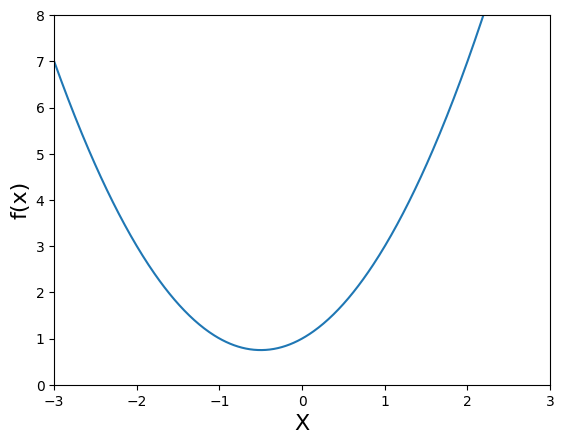

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [5]:
def df(x):
    return 2 * x + 1

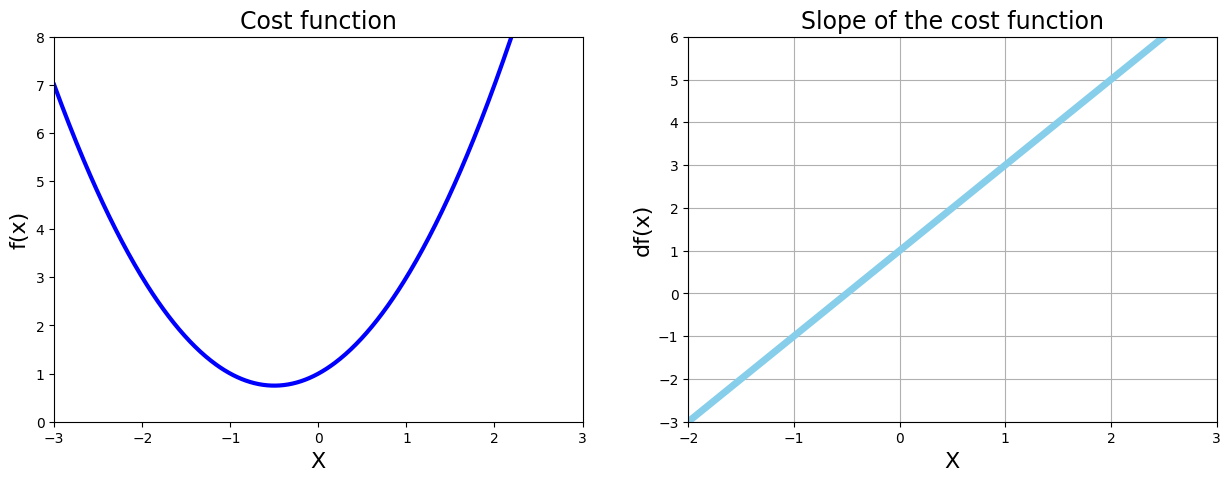

In [6]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent

In [8]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # Calculate the gradient at previous_x
    new_x = previous_x - step_multiplier * gradient  # Update new_x using gradient descent formula

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(df(new_x))  # Append the slope/gradient at new_x

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


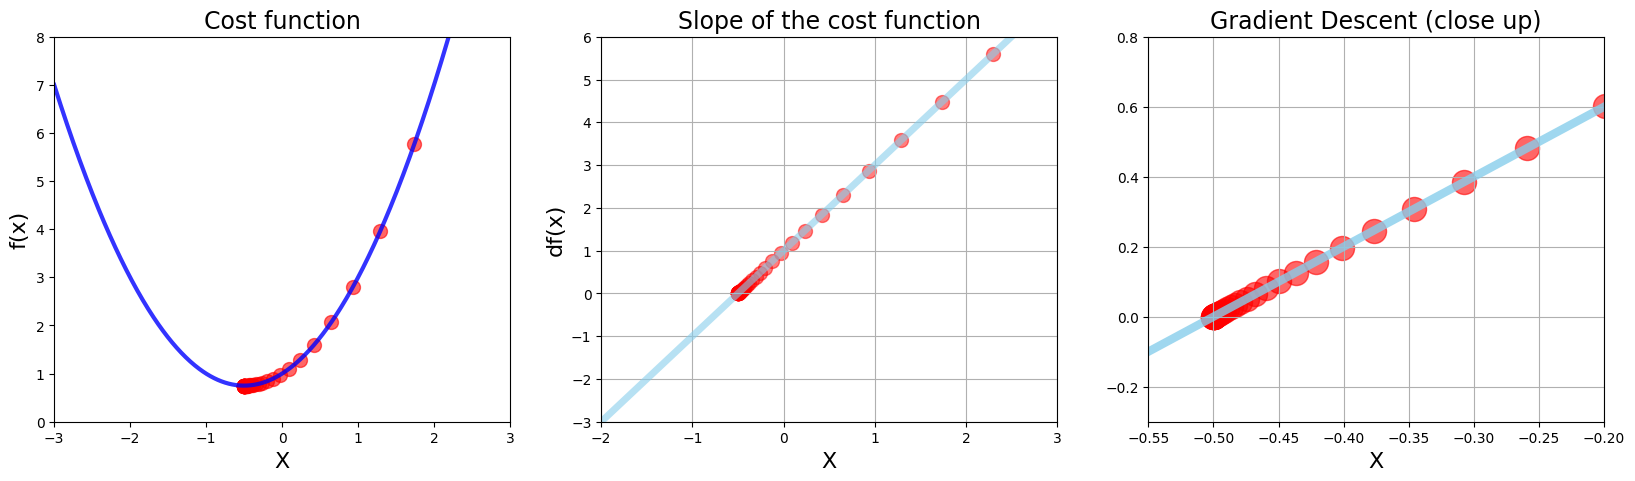

In [9]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [10]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return  ## [REQUIRED]

def dg(x):
    return ## [REQUIRED]

In [11]:
## TASK-3 : Plot function and derivative side by side like has been done earlier

## Gradient Descent

In [12]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [16]:
local_min, list_x, deriv_list = gradient_descent(df, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -0.4756397238827747
Number of steps: 93


In [18]:
def dg(x):
    # Define your function here for which you want to find the minimum
    return x**2  # For example purposes only; replace this with your function

def derivative_dg(x):
    # Define the derivative of your function here
    return 2 * x  # For example purposes only; replace this with the actual derivative

def gradient_descent(derivative_func, initial_guess, multiplier, precision):
    x = initial_guess
    x_list = [initial_guess]
    deriv_list = []

    for _ in range(1000):  # Maximum iterations to avoid infinite loops
        derivative = derivative_func(x)
        deriv_list.append(derivative)
        x_new = x - multiplier * derivative

        if abs(x_new - x) < precision:
            break

        x = x_new
        x_list.append(x)

    return x, x_list, deriv_list

# Using the gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_dg, -0.5, 0.01, 0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


Local min occurs at: -0.004994767327965779
Number of steps: 229


In [20]:
def dg(x):
    # Define your function here for which you want to find the minimum
    return x**2  # For example purposes only; replace this with your function

def derivative_dg(x):
    # Define the derivative of your function here
    return 2 * x  # For example purposes only; replace this with the actual derivative

def gradient_descent(derivative_func, initial_guess, multiplier, precision):
    x = initial_guess
    x_list = [initial_guess]
    deriv_list = []

    for _ in range(1000):  # Maximum iterations to avoid infinite loops
        derivative = derivative_func(x)
        deriv_list.append(derivative)
        x_new = x - multiplier * derivative

        if abs(x_new - x) < precision:
            break

        x = x_new
        x_list.append(x)

    return x, x_list, deriv_list

# Using the gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_dg, -0.5, 0.01, 0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


Local min occurs at: -0.004994767327965779
Number of steps: 229


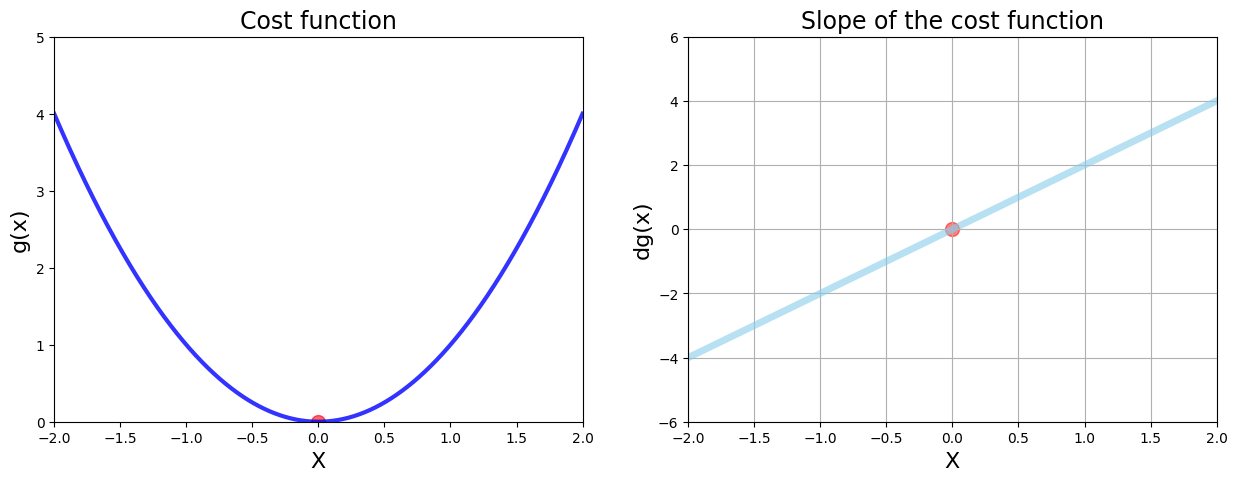

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define your function 'dg' and its derivative 'derivative_dg'
def dg(x):
    return x**2  # Replace this with your function

def derivative_dg(x):
    return 2 * x  # Replace this with the actual derivative of your function

# Define the gradient descent function
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, precision=0.0001):
    x = initial_guess
    x_list = [initial_guess]
    deriv_list = []

    for _ in range(1000):  # Maximum iterations to avoid infinite loops
        derivative = derivative_func(x)
        deriv_list.append(derivative)
        x_new = x - multiplier * derivative

        if abs(x_new - x) < precision:
            break

        x = x_new
        x_list.append(x)

    return x, x_list, deriv_list

# Set up data for plotting the function and derivative
x_2 = np.linspace(-2, 2, 1000)  # Adjust the range based on your function

# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=derivative_dg, initial_guess=0)

# Plot function and derivative and scatter plot side by side
plt.figure(figsize=[15, 5])

# 1st Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0, 5)  # Adjust y-limit based on your function

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, dg(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2nd Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 6)  # Adjust y-limit based on your function's derivative

plt.plot(x_2, derivative_dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()


# Example 3 - Divergence and Overflow

## $$h(x) = x^5 - 2x^4 + 2$$

In [23]:
## TASK-4 : Code the same things as they were done for the first two examples

# The Learning Rate

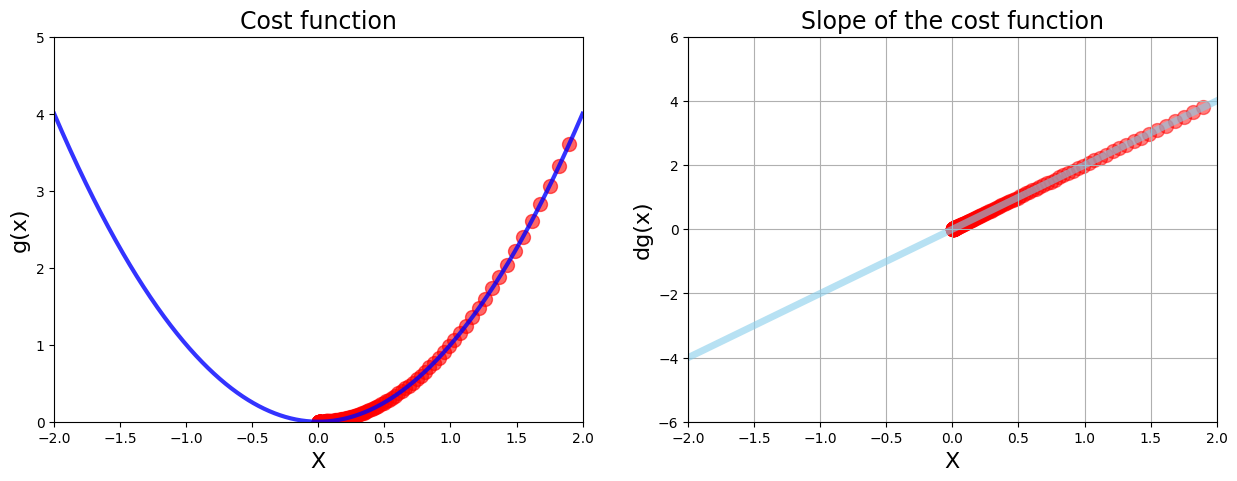

Number of steps is: 164


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define your function 'dg' and its derivative 'derivative_dg'
def dg(x):
    return x**2  # Replace this with your function

def derivative_dg(x):
    return 2 * x  # Replace this with the actual derivative of your function

# Define the gradient descent function
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, precision=0.0001, max_iter=1000):
    x = initial_guess
    x_list = [initial_guess]
    deriv_list = []

    for _ in range(max_iter):
        derivative = derivative_func(x)
        deriv_list.append(derivative)
        x_new = x - multiplier * derivative

        if abs(x_new - x) < precision:
            break

        x = x_new
        x_list.append(x)

    return x, x_list, deriv_list

# Set up data for plotting the function and derivative
x_2 = np.linspace(-2, 2, 1000)  # Adjust the range based on your function

# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=derivative_dg, initial_guess=1.9,
                                                 multiplier=0.02, precision=0.0001, max_iter=500)

# Plot function and derivative and scatter plot side by side
plt.figure(figsize=[15, 5])

# 1st Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0, 5)  # Adjust y-limit based on your function

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, dg(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2nd Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 6)  # Adjust y-limit based on your function's derivative

plt.plot(x_2, derivative_dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is:', len(list_x))


In [30]:
# Define your function 'dg' and its derivative 'derivative_dg'
def dg(x):
    return x**2  # Replace this with your function

def derivative_dg(x):
    return 2 * x  # Replace this with the actual derivative of your function

# Define the gradient descent function
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, precision=0.0001, max_iter=1000):
    # Implementation of gradient descent function remains the same

# Calling gradient descent function for different learning rates
  n = 100

low_gamma = gradient_descent(derivative_func=derivative_dg, initial_guess=3,
                             multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=derivative_dg, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=derivative_dg, initial_guess=3,
                              multiplier=0.002, precision=0.0001, max_iter=n)

insane_gamma = gradient_descent(derivative_func=derivative_dg, initial_guess=1.9,
                                multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting the results
# The rest of the code for plotting remains unchanged


In [31]:
## TASK-7 : Plot reduction in cost for each iteration

# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [ ]:
## TASK-8 : Code the same things as they were done for the first two examples


In [32]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


TypeError: ignored

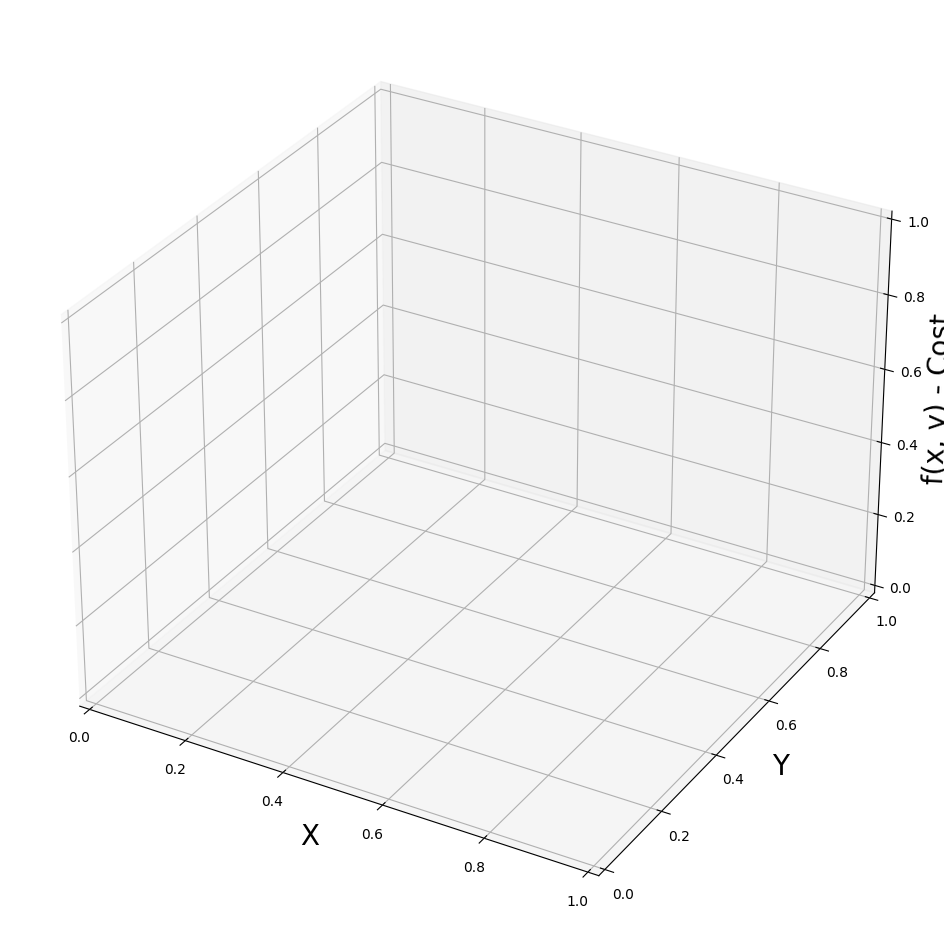

In [33]:
# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

##########################
##########################

## TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.

##########################
##########################

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = ## [REQUIRED]

## $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [35]:
from sympy import symbols, diff

# Define symbolic variables 'a' and 'b' as 'x' and 'y'
a, b = symbols('x y')

# Define the cost function f(x, y)
f = a**2 + b**3  # Replace this with your desired function

# Print the defined cost function f(x, y)
print('Our cost function f(x, y) is: ', f)

# Calculate and print the partial derivative of f(x, y) with respect to 'y' (b)
partial_derivative_wrt_y = diff(f, b)
print('Partial derivative wrt y is: ', partial_derivative_wrt_y)

# Evaluate the value of f(x, y) at x=1.8, y=1.0
value_at_specific_point = f.subs({a: 1.8, b: 1.0})
print('Value of f(x, y) at x=1.8 y=1.0 is: ', value_at_specific_point)

# Calculate and print the value of the partial derivative of f(x, y) with respect to 'x' (a) at x=1.8, y=1.0
partial_derivative_wrt_x_value = diff(f, a).subs({a: 1.8, b: 1.0})
print('Value of partial derivative wrt x: ', partial_derivative_wrt_x_value)


Our cost function f(x, y) is:  x**2 + y**3
Partial derivative wrt y is:  3*y**2
Value of f(x, y) at x=1.8 y=1.0 is:  4.24000000000000
Value of partial derivative wrt x:  3.60000000000000


## Batch Gradient Descent with SymPy

In [37]:
#import numpy as np

# Define the cost function 'f' in terms of 'x' and 'y'
def f(x, y):
    return x**2 + y**3  # Replace this with your desired function

# Define the initial parameters and hyperparameters
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # Initial guess for x and y

# Gradient Descent
for n in range(max_iter):
    # Calculate gradients using numerical differentiation
    gradient_x = (f(params[0] + 0.001, params[1]) - f(params[0], params[1])) / 0.001
    gradient_y = (f(params[0], params[1] + 0.001) - f(params[0], params[1])) / 0.001
    gradients = np.array([gradient_x, gradient_y])

    # Update parameters using gradient descent
    params = params - multiplier * gradients

# Results
print('Values in gradient array:', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))


Values in gradient array: [2.11758237e-19 1.29477978e-04]
Minimum occurs at x value of: -0.0004999999999999999
Minimum occurs at y value of: 0.006050282560028374
The cost is: 4.7147615365943723e-07


In [38]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return ## [REQUIRED]

def fpy(x, y):
    return ## [REQUIRED]

In [40]:
import numpy as np

# Given functions: fpx, fpy, and f
def fpx(x, y):
    # Define the partial derivative of f with respect to x
    # Replace this with the actual partial derivative function
    return 2 * x  # Example: for f(x, y) = x^2, fpx = 2*x

def fpy(x, y):
    # Define the partial derivative of f with respect to y
    # Replace this with the actual partial derivative function
    return 3 * y**2  # Example: for f(x, y) = y^3, fpy = 3*y^2

def f(x, y):
    # Define the cost function f(x, y)
    # Replace this with your actual cost function
    return x**2 + y**3  # Example: f(x, y) = x^2 + y^3

# Setup gradient descent
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # Initial guess

# Gradient Descent
for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array:', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))


Values in gradient array: [1.57835979e-48 1.29393921e-04]
Minimum occurs at x value of: 6.313439179878134e-49
Minimum occurs at y value of: 0.0065545035641964315
The cost is: 2.8159141612323167e-07


## Graphing 3D Gradient Descent

In [41]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [1.86728201e-19 7.80531101e-04]
Minimum occurs at x value of:  7.469128023985783e-20
Minimum occurs at y value of:  0.016051951036056753
The cost is:  4.136028083589838e-06


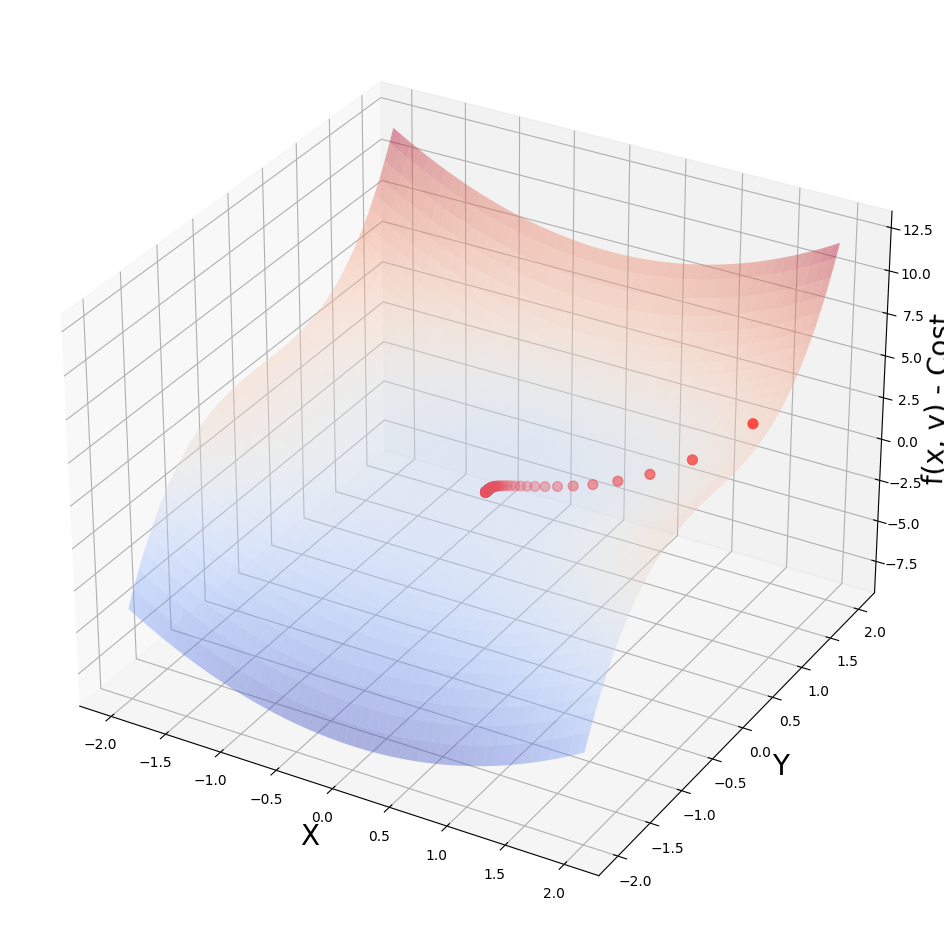

In [42]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

## For Reference, practice and play with the code below

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [43]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [44]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


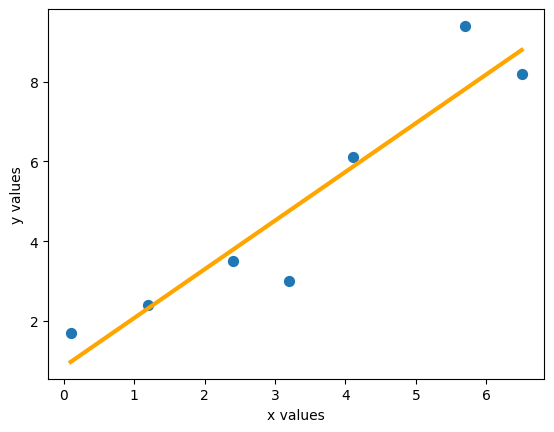

In [45]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [46]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [47]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [48]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [49]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [50]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


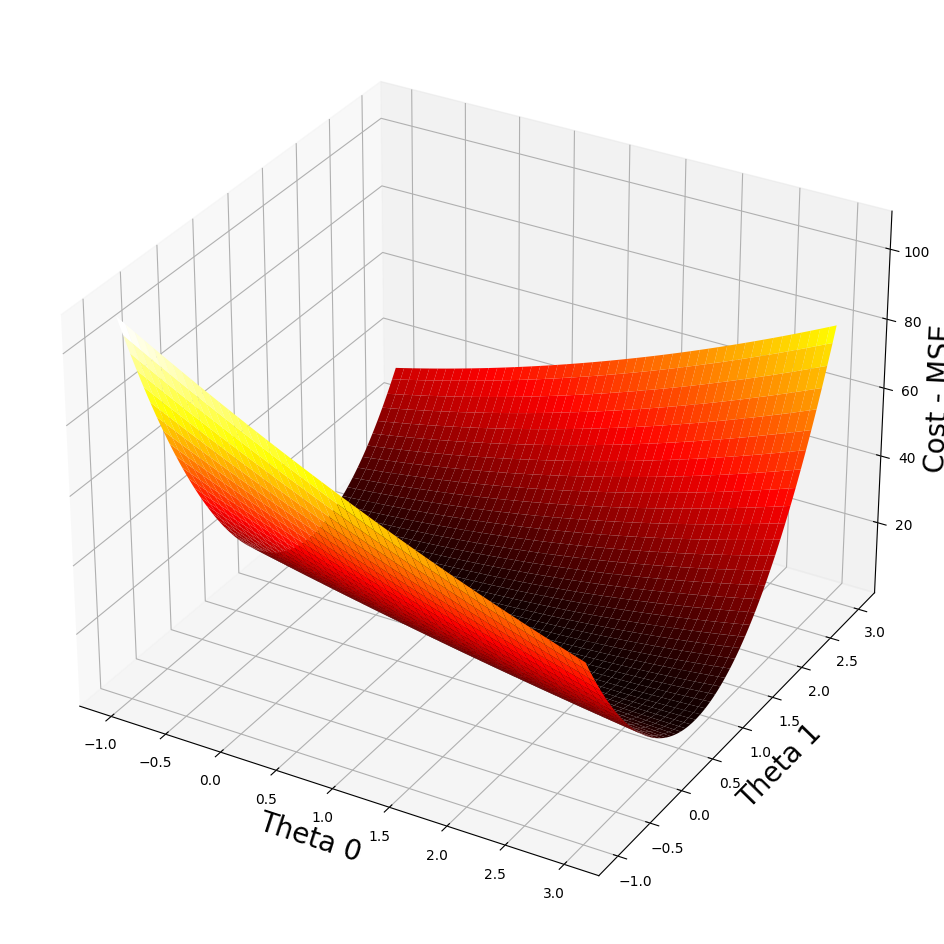

In [51]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [52]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [53]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [54]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


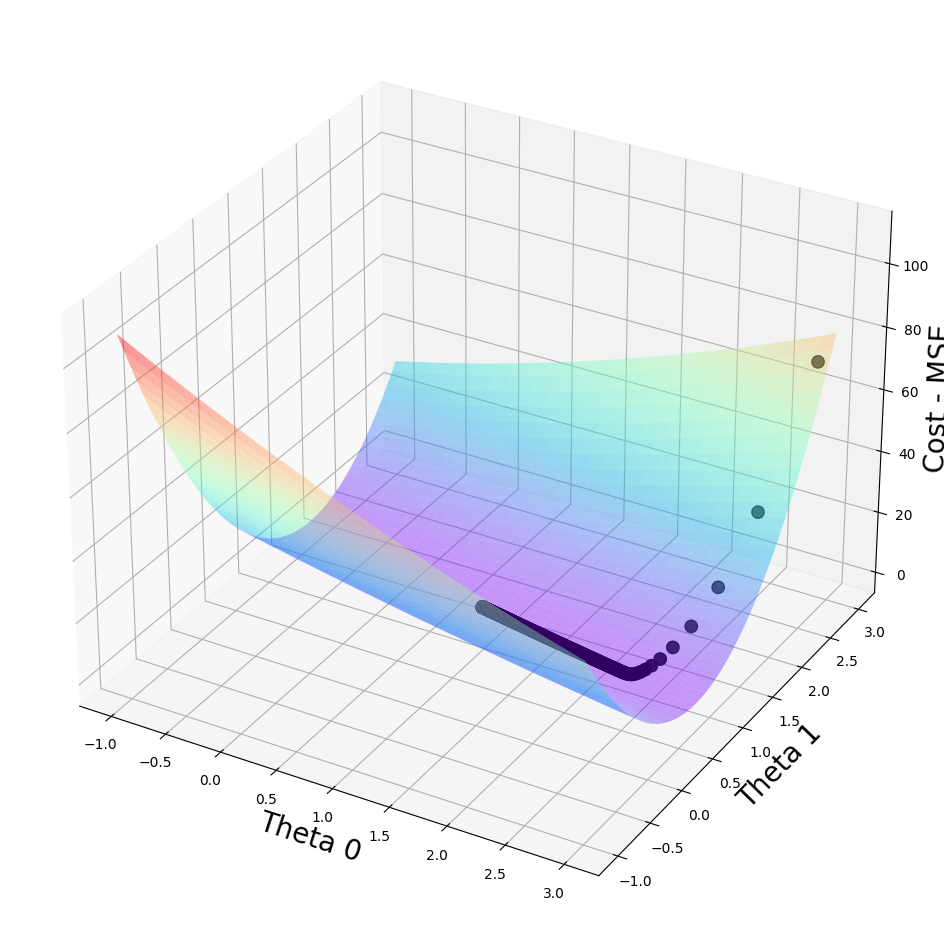

In [55]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()